In [1]:
import os
os.chdir("C:\AksharaPande\Research\yeast\yeast1")

In [2]:
import pandas as pd
dff=pd.read_csv("yeast_intron_seq.csv")
dff1=pd.read_csv("test_nt.aac")


In [3]:
dff_1=pd.concat([dff.iloc[:,0],dff.iloc[:,-1]],axis=1)

In [4]:
dff_1.head()

,SGDID,yeasU_inUron_seq
0,S000033439,GUAAGUACAGAAAGCCACAGAGUACCAUCUAGGAAAUUAACAUUAU...
1,S000035969,CGACUUCCUGAUUAAACAGGAAGACAAAGCA
2,S000031943,GUAUGUUCCGAUUUAGUUUACUUUAUAGAUCGUUGUUUUUCUUUCU...
3,S000030736,CUUCAAUGUGUCGUUAGUAAAUAAUCUUUCACAAUAUAGUACGUUU...
4,S000033745,AAAUAUCUUGACCGCAGUGAACUGUGGGAAUA


In [5]:
df1=pd.read_csv("hairpin.csv",header=None)
l1=[]
l2=[]
for i in range(len(df1)):
    l1.append(df1.iloc[i,0].split("\t")[0])
    l2.append(df1.iloc[i,0].split("\t")[-1])
    
df3=pd.DataFrame()
df3["species"]=l1
df3["seq"]=l2


In [6]:
df3.head()

,species,seq
0,>cel-let-7 MI0000001 Caenorhabditis elegans le...,UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAU...
1,>cel-lin-4 MI0000002 Caenorhabditis elegans li...,AUGCUUCCGGCCUGUUCCCUGAGACCUCAAGUGUGAGUGUACUAUU...
2,>cel-mir-1 MI0000003 Caenorhabditis elegans mi...,AAAGUGACCGUACCGAGCUGCAUACUUCCUUACAUGCCCAUACUAU...
3,>cel-mir-2 MI0000004 Caenorhabditis elegans mi...,UAAACAGUAUACAGAAAGCCAUCAAAGCGGUGGUUGAUGUGUUGCA...
4,>cel-mir-34 MI0000005 Caenorhabditis elegans m...,CGGACAAUGCUCGAGAGGCAGUGUGGUUAGCUGGUUGCAUAUUUCC...


In [7]:
df4=pd.read_csv("hairpin_sp.aac")

In [8]:
df4.head()

,A,U,G,C,Unnamed: 4
0,26.26,30.30,24.24,19.19,NaN
1,18.09,27.66,27.66,26.60,NaN
2,33.33,26.04,23.96,16.67,NaN
3,27.55,30.61,22.45,19.39,NaN
4,21.65,26.80,23.71,27.84,NaN


In [9]:
dff1.head()

,A,T,G,C,Unnamed: 4
0,31.86,36.28,14.16,17.70,NaN
1,41.94,16.13,19.35,22.58,NaN
2,29.78,40.16,17.21,12.84,NaN
3,37.78,26.67,17.78,17.78,NaN
4,34.38,25.00,25.00,15.62,NaN


In [14]:
L_1=[]
for i in range(0,len(df3)):
    L_1.append(df3.iloc[i,0].split(" ")[0][1:])


In [16]:
D_1=pd.DataFrame()

In [17]:
D_1['species']=L_1


In [18]:
D1=pd.concat([D_1,df4.iloc[:,:-1]],axis=1)
D2=pd.concat([dff_1.iloc[:,0],dff1.iloc[:,:-1]],axis=1)

In [23]:
D2.columns = ['species','A','U','G','C']

In [25]:
D3=pd.concat([D1,D2],axis=0)

In [27]:
D3.tail()

,species,A,U,G,C
340,S000030518,32.22,42.22,15.56,10.00
341,S000036652,32.27,34.47,14.91,18.34
342,S000030948,30.3,36.02,15.04,18.64
343,S000036026,29.75,37.25,17.25,15.75
344,S000037581,34.35,31.30,15.27,19.08


In [51]:
data=pd.read_csv("D3.csv")

In [87]:
data.head()

,species,A,U,G,C
0,cel-let-7,26.26,30.30,24.24,19.19
1,cel-lin-4,18.09,27.66,27.66,26.60
2,cel-mir-1,33.33,26.04,23.96,16.67
3,cel-mir-2,27.55,30.61,22.45,19.39
4,cel-mir-34,21.65,26.80,23.71,27.84


In [52]:
#import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(data.iloc[:,1:].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['A', 'U', 'G', 'C'])
 
#print("Scaled Dataset Using MinMaxScaler")
#df_scaled.head()
 

In [54]:
df_scaled

,A,U,G,C
0,0.5252,0.543123,0.363603,0.334667
1,0.3618,0.494052,0.427242,0.469443
2,0.6666,0.463941,0.358392,0.288832
3,0.5510,0.548885,0.330294,0.338305
4,0.4330,0.478067,0.353740,0.491997
...,...,...,...,...
38928,0.6444,0.764684,0.202084,0.167515
38929,0.6454,0.620632,0.189989,0.319207
38930,0.6060,0.649442,0.192408,0.324664
38931,0.5950,0.672305,0.233532,0.272099


<AxesSubplot:title={'center':'A-U scatter plot'}, xlabel='A', ylabel='U'>

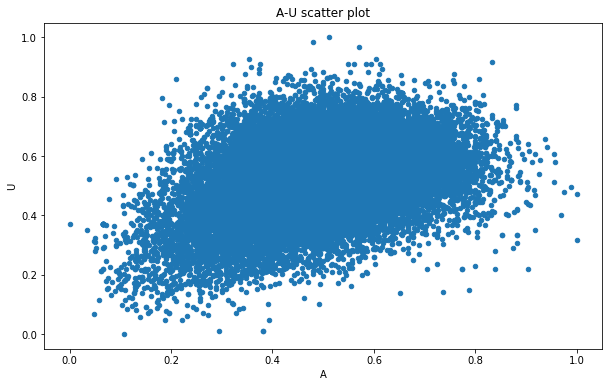

In [55]:
df_scaled.plot(x='A', y='U', kind='scatter',
        figsize=(10,6),
        title='A-U scatter plot')

<AxesSubplot:title={'center':'G-C scatter plot'}, xlabel='G', ylabel='C'>

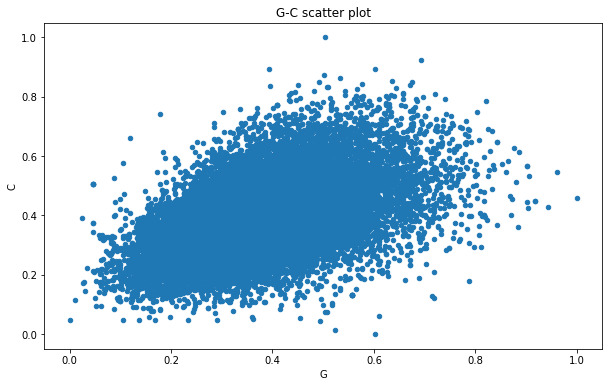

In [56]:
df_scaled.plot(x='G', y='C', kind='scatter',
        figsize=(10,6),
        title='G-C scatter plot')

<AxesSubplot:title={'center':'Distribution of A'}, ylabel='Frequency'>

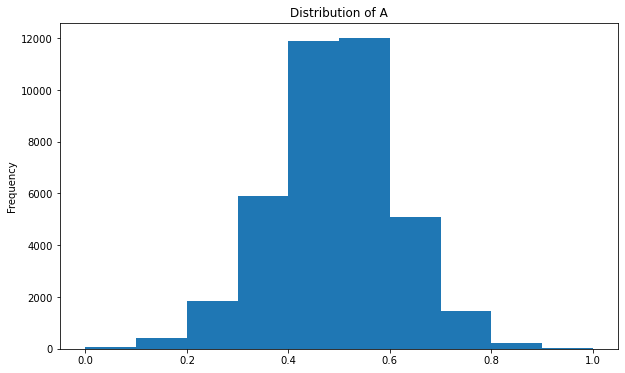

In [58]:
df_scaled['A'].plot(kind='hist', figsize=(10,6), title='Distribution of A')

<AxesSubplot:title={'center':'Distribution of U'}, ylabel='Frequency'>

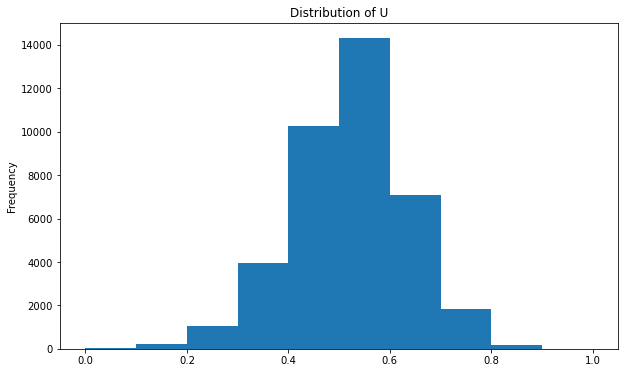

In [59]:
df_scaled['U'].plot(kind='hist', figsize=(10,6), title='Distribution of U')

<AxesSubplot:title={'center':'Distribution of G'}, ylabel='Frequency'>

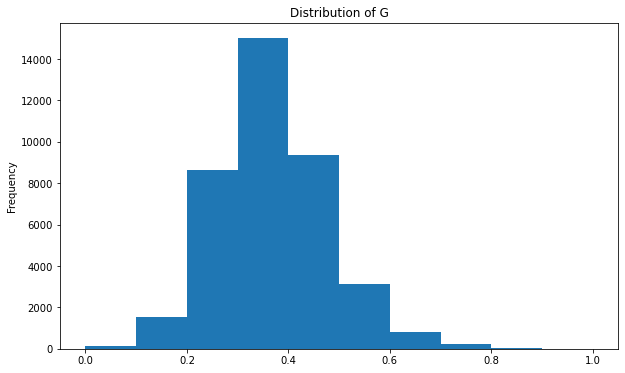

In [60]:
df_scaled['G'].plot(kind='hist', figsize=(10,6), title='Distribution of G')

<AxesSubplot:title={'center':'Distribution of C'}, ylabel='Frequency'>

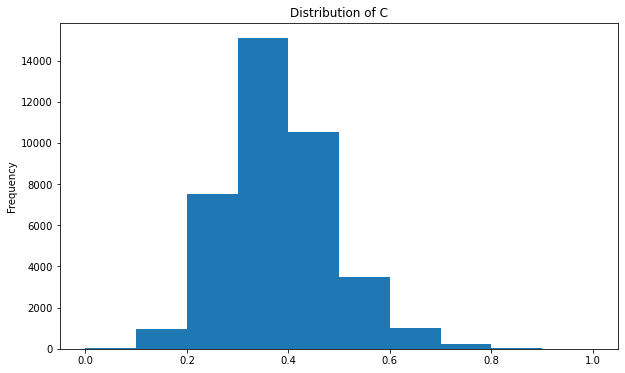

In [62]:
df_scaled['C'].plot(kind='hist', figsize=(10,6), title='Distribution of C')

<AxesSubplot:title={'center':'A'}, xlabel='U'>

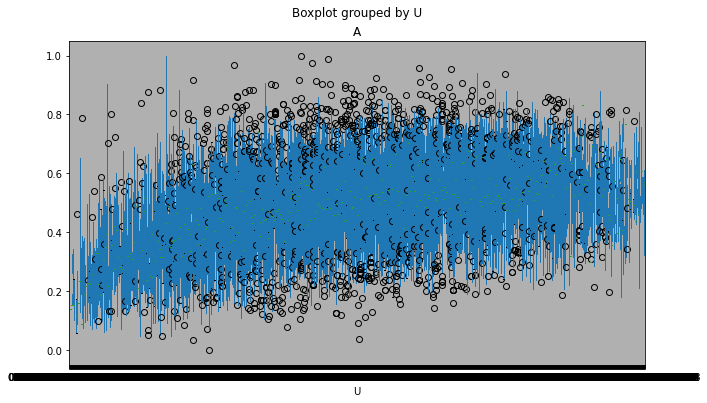

In [64]:
df_scaled.boxplot(column='A', by='U', figsize=(10,6))

<AxesSubplot:>

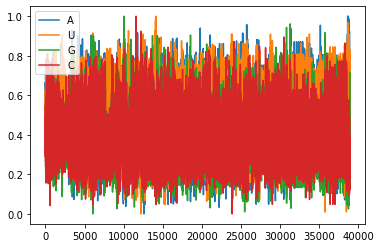

In [72]:
df_scaled.plot()

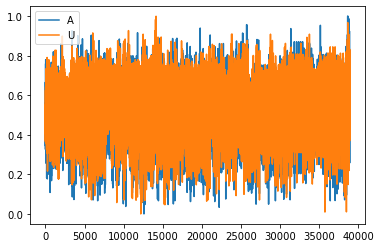

In [73]:
df_scaled.plot(y=['A','U']);

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'U'}>],
       [<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'C'}>]], dtype=object)

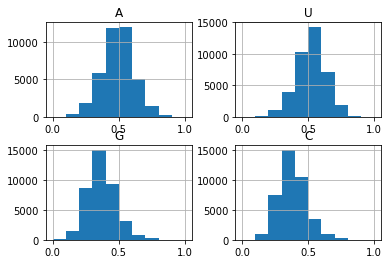

In [74]:
df_scaled.hist()

<AxesSubplot:>

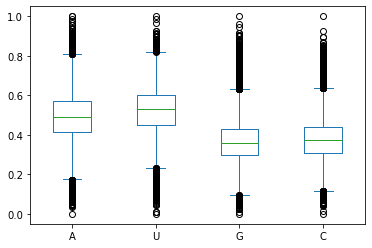

In [75]:
df_scaled.plot.box()

C:\Users\pande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='U'>

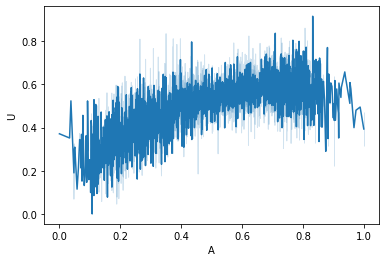

In [65]:
import seaborn as sns
 

# plotting lineplot
sns.lineplot( df_scaled['A'], df_scaled['U'])

C:\Users\pande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A'>

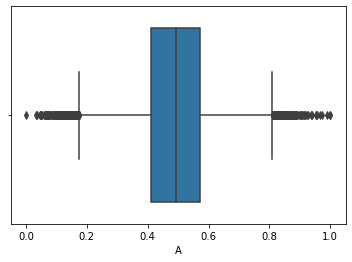

In [66]:
sns.boxplot( df_scaled['A'] )

<AxesSubplot:xlabel='A', ylabel='U'>

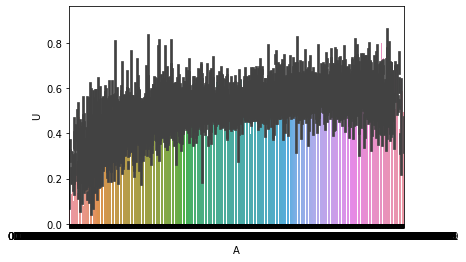

In [68]:
sns.barplot(x ="A", y ="U", data = df_scaled)

C:\Users\pande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='count'>

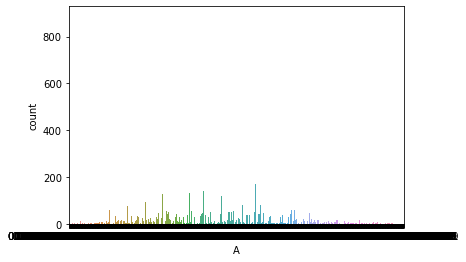

In [69]:
sns.countplot(df_scaled["A"])

<AxesSubplot:xlabel='G', ylabel='C'>

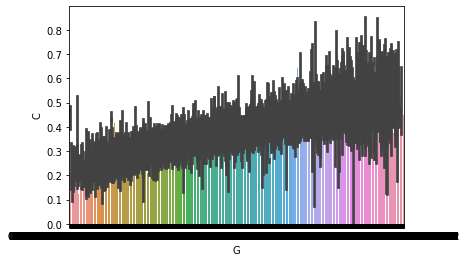

In [70]:
sns.barplot(x ="G", y ="C", data = df_scaled)

C:\Users\pande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A', ylabel='Density'>

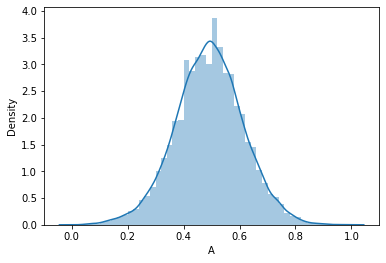

In [71]:
sns.distplot( df_scaled['A'])

In [89]:
df_sc1=pd.concat([data.iloc[:,0],df_scaled],axis=1)

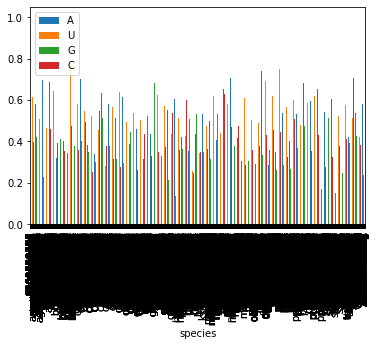

In [91]:
df_sc1.groupby('species').mean().plot.bar();